# Lab Instructions

You have been hired by a record executive to design a guaranteed smash hit song based on data.  The exec has decided that if you make a song that has all the most popular features of recent songs then it will definitely be a hit.  So if - for example - the most common key in the Spotify data is C# then we would want the song we are designing to also be in C#.  If a "typical" value of BPM is between 120 and 130 then we would want the song we are designing to also have a tempo between 120 and 130 BMP.

Visualize and describe the distribution of:
* BPM
* Key
* Mode
* Danceability
* Energy
* Speechiness
* Acousticness

Based on your visualizations and calculations, what values for each of these features would make a song a guaranteed smash hit?  For quantitative features, you should propose a range of values.

Use a large language model to help you write code to identify if there are any songs in the Spotify dataset that meet all of the criteria we determined.  What is/are the artist(s) and title(s) of the song?  Were any of these songs actually popular?

Pick a song that you know was a smash hit. How do the values of BPM, key, mode, danceability, etc. compare to other songs? 

**Hint:**  Import the Spotify data using `df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')`.

In [2]:
import pandas as pd

df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


<Axes: ylabel='Frequency'>

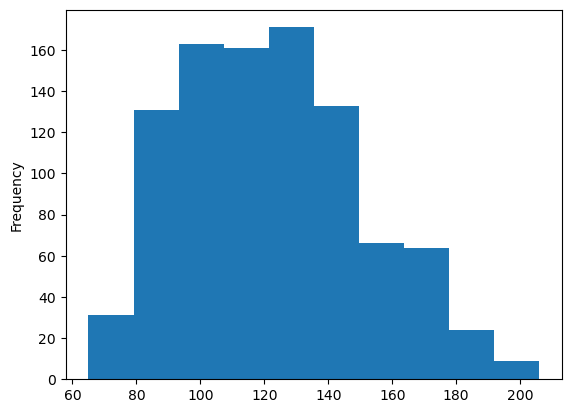

In [3]:
df['bpm'].plot(kind='hist')

In [4]:

filtered_df = df [(df['bpm'] >= 120) & (df['bpm'] <= 140) & (df['mode'] == 'Minor') & (df['key'] == 'A') ]

filtered_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
93,Donï¿½ï¿½ï¿½t Bl,Taylor Swift,1,2017,11,8,4875,23,685032533,19,...,136,A,Minor,62,19,53,11,0,6,4
120,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
194,Shut up My Moms Calling,Hotel Ugly,1,2020,2,10,1788,14,405136812,1,...,139,A,Minor,48,37,41,32,0,10,10


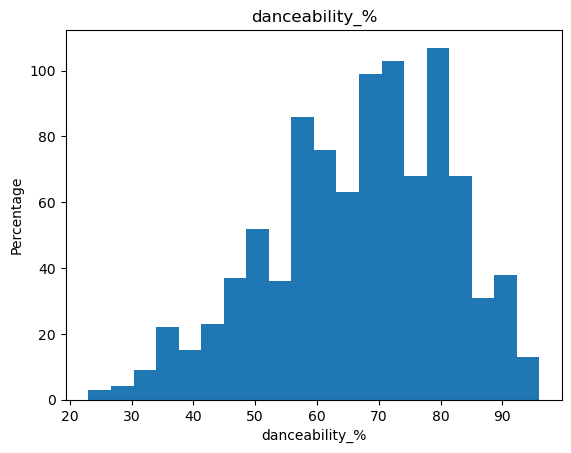

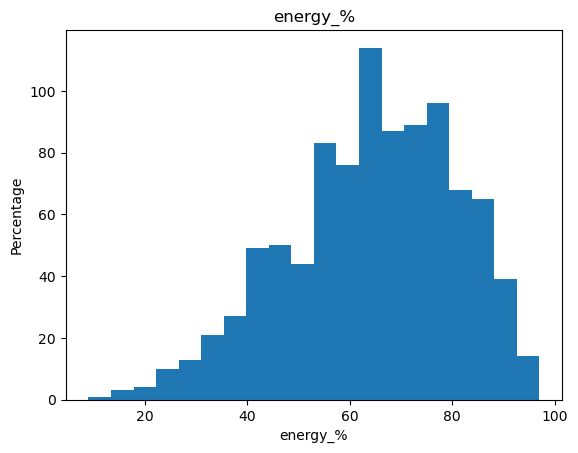

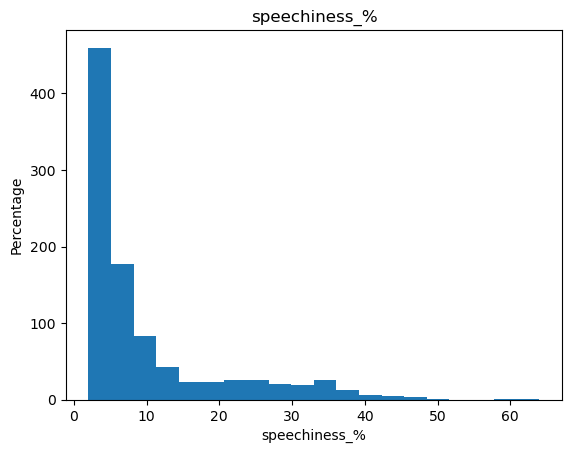

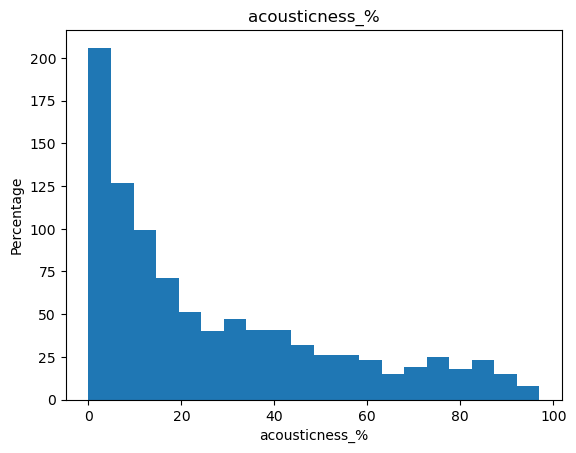

In [10]:
import matplotlib.pyplot as plt

features = ['danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%']

for col in features:
    df[col].plot(kind='hist', bins=20, title=col)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.show()

In [11]:
filtered_df = df[
    (df['bpm'].between(120,140)) &
    (df['key'] == 'A') &
    (df['mode'] == 'Minor') &
    (df['danceability_%'].between(50,80)) &
    (df['energy_%'].between(70,90)) &
    (df['speechiness_%'] < 20) &
    (df['acousticness_%'] < 30)
]
filtered_df[['track_name','artist(s)_name','streams']].head(10)

,track_name,artist(s)_name,streams
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",1897517891


Compare to a "Hit" like Taylor Swift's "Cruel Summer".

In [12]:
song = df[df['track_name'].str.contains("Cruel Summer", case=False)]
print(song[['track_name','artist(s)_name','bpm','key','mode',
            'danceability_%','energy_%','speechiness_%','acousticness_%']])

     track_name artist(s)_name  bpm key   mode  danceability_%  energy_%  \
3  Cruel Summer   Taylor Swift  170   A  Major              55        72   

   speechiness_%  acousticness_%  
3             15              11  


This song matches with a typical "Hit song".